In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('movies.csv')

In [3]:
df1.head(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
df1.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**Since Gross column tends to have a lot of null values, we are dropping the entire column**

In [6]:
df2 = df1.drop('Gross', axis = 1)

In [7]:
df2.head(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0


**Runtime column tends to have significantly higher null values, to decide on whether to drop it or not,we are plotting histogram**

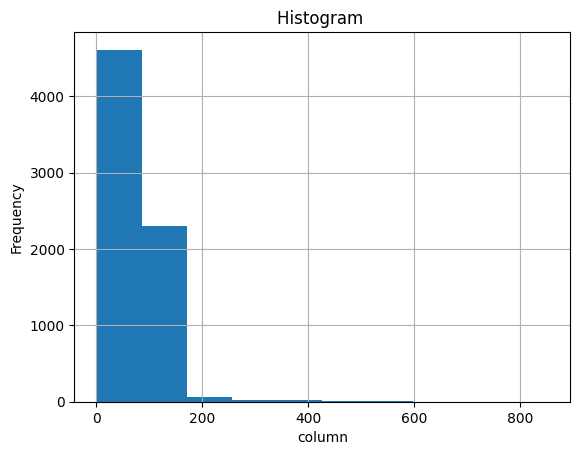

In [8]:
plt.figure()
df2['RunTime'].dropna().hist()
plt.title(f'Histogram ')
plt.xlabel('column')
plt.ylabel('Frequency')
plt.show()

In [9]:
df2['RunTime'].unique()

array([121.,  25.,  44.,  23.,  nan,  50., 110.,  53.,  30., 114.,  42.,
       107.,  60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,
        58.,  24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,
        31., 104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,
        99., 124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91.,
       117., 135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137.,
       209., 201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145.,
       128., 147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11.,
       152.,  94., 133., 298.,  28., 126., 102., 106., 385., 122., 452.,
       120., 494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164.,
       386., 363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154.,
       130., 491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78.,
       316., 264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,
        21., 220., 331.,  39.,   9., 281.,  10., 55

In [10]:
df2['RunTime'].describe()

count    7041.000000
mean       68.688539
std        47.258056
min         1.000000
25%        36.000000
50%        60.000000
75%        95.000000
max       853.000000
Name: RunTime, dtype: float64

**After analysing the histogram and other aspects, we are dropping the runtime column as it has higher frequency of 0 (null) values**

In [11]:
df3 = df2.drop('RunTime', axis = 1)

In [12]:
df3.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062"
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870"
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805"
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849"
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN


In [13]:
df3.duplicated().sum()

432

In [14]:
df4 = df3.drop_duplicates()

In [15]:
df4.duplicated().sum()

0

In [16]:
df4.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062"
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870"
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805"
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849"
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN


**Cleaning the year column**<br/>
*only considering the starting year of the movie*

In [17]:
df4.YEAR.unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [18]:
df5 = df4.loc[:,'Year_of_release'] = df4['YEAR'].str.extract(r'(\d{4})').astype(str)

C:\Users\Dr.Ramesh Vasu\AppData\Local\Temp\ipykernel_20792\2505823166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5 = df4.loc[:,'Year_of_release'] = df4['YEAR'].str.extract(r'(\d{4})').astype(str)


In [19]:
df5.head()

,0
0,2021
1,2021
2,2010
3,2013
4,2021


In [20]:
df6 = pd.concat([df4, df5], axis=1)

In [21]:
df6.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Year_of_release,0
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",2021,2021
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",2021,2021
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",2010,2010
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",2013,2013
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,2021,2021


In [22]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9567 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MOVIES           9567 non-null   object 
 1   YEAR             9025 non-null   object 
 2   GENRE            9489 non-null   object 
 3   RATING           8168 non-null   float64
 4   ONE-LINE         9567 non-null   object 
 5   STARS            9567 non-null   object 
 6   VOTES            8168 non-null   object 
 7   Year_of_release  9567 non-null   object 
 8   0                9567 non-null   object 
dtypes: float64(1), object(8)
memory usage: 747.4+ KB


In [23]:
df7 = df6.iloc[:,:-1]

In [26]:
df7['GENRE'].unique()

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Horror            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
     

**Now cleaning the genre column**,<br/>
*giving each genre their own column*

In [26]:
movie_genre = []
for genre in df7.GENRE:
    g = str(genre).split(',')
    for i in g:
        i = i.strip() 
        if i not in movie_genre:
            movie_genre.append(str(i))

In [27]:
print(movie_genre, end='')

['Action', 'Horror', 'Thriller', 'Animation', 'Adventure', 'Drama', 'Comedy', 'Crime', 'Romance', 'Mystery', 'Fantasy', 'History', 'Sci-Fi', 'Biography', 'Family', 'Documentary', 'Music', 'Sport', 'Short', 'Game-Show', 'Reality-TV', 'Musical', 'War', 'Western', 'Film-Noir', 'nan', 'Talk-Show', 'News']

In [28]:
len(movie_genre)

28

In [29]:
df8 = df7.copy()

In [30]:
df8['GENRE']=df8['GENRE'].astype(str)

In [31]:
for genre in movie_genre:
    df8[genre] = df8['GENRE'].apply(lambda x: 1 if genre in x else 0)

In [32]:
df8.head(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Year_of_release,Action,Horror,...,Short,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,nan,Talk-Show,News
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",2021,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",2021,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",2010,0,1,...,0,0,0,0,0,0,0,0,0,0


**dropping the unnecessary column for clustering**<br/> *deleting stars column is solely one's decision, i'm deleting it cuz my motive for clustering is solely based on the ratings and votes of the movie*

In [33]:
df9 = df8.drop(['YEAR','GENRE','ONE-LINE','STARS'],axis = 1)

In [34]:
df9

,MOVIES,RATING,VOTES,Year_of_release,Action,Horror,Thriller,Animation,Adventure,Drama,...,Short,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,nan,Talk-Show,News
0,Blood Red Sky,6.1,"21,062",2021,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Masters of the Universe: Revelation,5.0,"17,870",2021,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,8.2,"885,805",2010,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Rick and Morty,9.2,"414,849",2013,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,NaN,NaN,2021,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,NaN,NaN,2022,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9995,Arcane,NaN,NaN,2021,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,Heart of Invictus,NaN,NaN,2022,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,The Imperfects,NaN,NaN,2021,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df9.isna().sum()

MOVIES                0
RATING             1399
VOTES              1399
Year_of_release       0
Action                0
Horror                0
Thriller              0
Animation             0
Adventure             0
Drama                 0
Comedy                0
Crime                 0
Romance               0
Mystery               0
Fantasy               0
History               0
Sci-Fi                0
Biography             0
Family                0
Documentary           0
Music                 0
Sport                 0
Short                 0
Game-Show             0
Reality-TV            0
Musical               0
War                   0
Western               0
Film-Noir             0
nan                   0
Talk-Show             0
News                  0
dtype: int64

*I wanted to try clustering on two different sets, one by eliminating the rows with NaN values and other by filling the NaN values, so i'm taking copy of the dataset*

In [36]:
d10 = df9.copy()

In [37]:
d10.dropna()

,MOVIES,RATING,VOTES,Year_of_release,Action,Horror,Thriller,Animation,Adventure,Drama,...,Short,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,nan,Talk-Show,News
0,Blood Red Sky,6.1,"21,062",2021,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Masters of the Universe: Revelation,5.0,"17,870",2021,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,8.2,"885,805",2010,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Rick and Morty,9.2,"414,849",2013,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Outer Banks,7.6,"25,858",2020,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,Sexify,7.1,103,2021,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9961,Sexify,6.9,96,2021,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9962,Sexify,7.1,100,2021,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9963,Castlevania,8.2,911,2017,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df9['RATING'] = df9['RATING'].fillna(df9['RATING'].median())

**NOTE:** *I have left the error messages as it is for future reference*

In [39]:
df9['VOTES'] = df9['VOTES'].fillna(df9['VOTES'].median())

TypeError: Cannot convert ['21,062' '17,870' '885,805' ... nan nan nan] to numeric

In [40]:
df9.VOTES.unique()

array(['21,062', '17,870', '885,805', ..., '5,868', '6,873', '911'],
      dtype=object)

In [41]:
df9['VOTES'] = df9['VOTES'].str.replace(',', '')

In [42]:
df9['VOTES'] .astype(float)

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            NaN
          ...   
9993         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
Name: VOTES, Length: 9567, dtype: float64

In [43]:
df9['VOTES'] = df9['VOTES'].fillna(df9['VOTES'].median())

TypeError: Cannot convert ['21062' '17870' '885805' ... nan nan nan] to numeric

In [44]:
df9['VOTES'] = pd.to_numeric(df9['VOTES'], errors='coerce')

In [45]:
df9['VOTES'] = df9['VOTES'].fillna(df9['VOTES'].median())

In [46]:
df9.isna().sum()

MOVIES             0
RATING             0
VOTES              0
Year_of_release    0
Action             0
Horror             0
Thriller           0
Animation          0
Adventure          0
Drama              0
Comedy             0
Crime              0
Romance            0
Mystery            0
Fantasy            0
History            0
Sci-Fi             0
Biography          0
Family             0
Documentary        0
Music              0
Sport              0
Short              0
Game-Show          0
Reality-TV         0
Musical            0
War                0
Western            0
Film-Noir          0
nan                0
Talk-Show          0
News               0
dtype: int64

In [47]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9567 entries, 0 to 9998
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MOVIES           9567 non-null   object 
 1   RATING           9567 non-null   float64
 2   VOTES            9567 non-null   float64
 3   Year_of_release  9567 non-null   object 
 4   Action           9567 non-null   int64  
 5   Horror           9567 non-null   int64  
 6   Thriller         9567 non-null   int64  
 7   Animation        9567 non-null   int64  
 8   Adventure        9567 non-null   int64  
 9   Drama            9567 non-null   int64  
 10  Comedy           9567 non-null   int64  
 11  Crime            9567 non-null   int64  
 12  Romance          9567 non-null   int64  
 13  Mystery          9567 non-null   int64  
 14  Fantasy          9567 non-null   int64  
 15  History          9567 non-null   int64  
 16  Sci-Fi           9567 non-null   int64  
 17  Biography        95

In [48]:
d10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9567 entries, 0 to 9998
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MOVIES           9567 non-null   object 
 1   RATING           8168 non-null   float64
 2   VOTES            8168 non-null   object 
 3   Year_of_release  9567 non-null   object 
 4   Action           9567 non-null   int64  
 5   Horror           9567 non-null   int64  
 6   Thriller         9567 non-null   int64  
 7   Animation        9567 non-null   int64  
 8   Adventure        9567 non-null   int64  
 9   Drama            9567 non-null   int64  
 10  Comedy           9567 non-null   int64  
 11  Crime            9567 non-null   int64  
 12  Romance          9567 non-null   int64  
 13  Mystery          9567 non-null   int64  
 14  Fantasy          9567 non-null   int64  
 15  History          9567 non-null   int64  
 16  Sci-Fi           9567 non-null   int64  
 17  Biography        95